In [1]:
import pandas as pd
import numpy as np
import scipy
import os
from sklearn.model_selection import cross_val_score, train_test_split,  RandomizedSearchCV
import matplotlib.pyplot as plt

In [2]:
#Chemins vers le répertoire courant, les sources de données et le répertoire donnant accès aux soumissions
_REP_PATH_ = os.getcwd()
_REP_DATA_PATH_ = _REP_PATH_+'/data/'
_REP_OUT_PATH_ = _REP_PATH_ + '/output/'

In [3]:
data=pd.read_csv(_REP_DATA_PATH_+"train.csv")
data

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,2909,28,18,182,58,1350,210,197,117,...,0,0,0,0,0,0,0,0,0,2
1,1,2757,334,30,212,83,1384,137,184,177,...,0,0,0,0,0,0,0,0,0,2
2,2,3283,248,4,150,15,5601,211,243,170,...,0,0,0,0,0,0,1,0,0,1
3,3,3019,330,14,541,-101,1811,186,222,175,...,0,0,0,0,0,0,0,0,0,2
4,4,3039,340,20,474,74,3407,175,207,169,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2521,187,17,30,1,1099,220,250,158,...,0,0,0,0,0,0,0,0,0,6
99996,99996,2891,341,16,30,9,3774,186,215,167,...,0,0,0,0,0,0,0,0,0,2
99997,99997,2563,129,9,134,18,569,236,235,129,...,0,0,0,0,0,0,0,0,0,2
99998,99998,3322,238,14,153,32,2773,195,251,192,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X_train=data.drop(columns=["Cover_Type"])
y_train=data['Cover_Type']


In [5]:
X_test=pd.read_csv(_REP_DATA_PATH_+"test.csv")

In [6]:
#Supprimer les colonnes d'identification
X_test=X_test.drop(columns=["row_ID"])
X_train=X_train.drop(columns=['Unnamed: 0'])

# Implémentation du modèle LightGBM

In [8]:
from lightgbm import LGBMClassifier

In [9]:
lgb=LGBMClassifier(random_state=42)

In [10]:
#Search of best estimators


param_distributions = {
    'learning_rate': np.arange(0.01, 0.21, 0.01),
    'n_estimators':[100,200,300,400],
    'max_depth':[3,5,7]
 
} 



grid = RandomizedSearchCV(estimator=lgb, param_distributions=param_distributions, n_iter=20, cv=4, n_jobs=-1, scoring="f1_weighted") #Tester avec accuracy


A la suite de notre cette phase de recherche `RandomizedSearchCV` (par souci de frugalité) codé ainsi, on a obtenu le modèle `lgb_best`dont on présente afin d'éviter de relancer la phase de recherche du meilleur estimateur coûteuse en temps.

```
grid.fit(X_train,y_train)
lgb_best=grid.best_estimator_
```

In [12]:
#Reinstancier le modèle sans lancer le Randomized SearchCV dont le meilleur estimateur est

lgb_best = LGBMClassifier(learning_rate=0.12, max_depth=5, n_estimators=400,
               random_state=42)
lgb_best.fit(X_train,y_train)

C:\Users\rober\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\rober\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2242
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 52
[LightGBM] [Info] Start training from score -1.010327
[LightGBM] [Info] Start training from score -0.719984
[LightGBM] [Info] Start training from score -2.768915
[LightGBM] [Info] Start training from score -5.358067
[LightGBM] [Info] Start training from score -4.113527
[LightGBM] [Info] Start training from score -3.517619
[LightGBM] [Info] Start training from score -3.333165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

LGBMClassifier(learning_rate=0.12, max_depth=5, n_estimators=400,
               random_state=42)

In [13]:
lgb_best

LGBMClassifier(learning_rate=0.12, max_depth=5, n_estimators=400,
               random_state=42)

# Phase de prédiction

In [15]:
y_pred=lgb_best.predict(X_test)

In [16]:
from joblib import load, dump
#Sauvegarder le modèle et ses paramètres
dump(lgb_best, 'prediction_fct_lightgbm.joblib')

['prediction_fct_lightgbm.joblib']

In [17]:
submission_df = pd.DataFrame({
    'row_ID': X_test.index,   
    'Cover_Type': y_pred      
})

submission_df.to_csv(_REP_OUT_PATH_+ 'prediction_fct_lightgbm.csv', index=False)

# Histogramme des probabilités prédites par le LightGBM pour chaque classe

In [19]:
y_pred_proba = lgb_best.predict_proba(X_test)


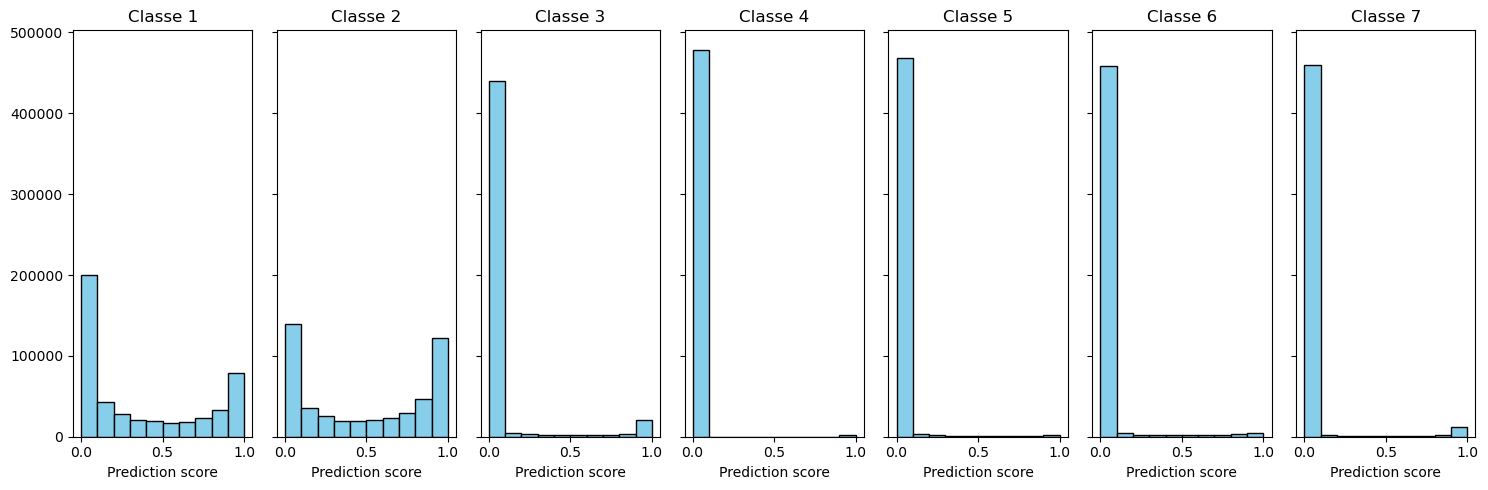

In [20]:
y_pred_proba = lgb_best.predict_proba(X_test)
num_classes = y_pred_proba.shape[1]

fig, axes = plt.subplots(1, num_classes, figsize=(15, 5), sharey=True)


for i in range(num_classes):
    axes[i].hist(y_pred_proba[:, i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Classe {i+1}')
    axes[i].set_xlabel("Prediction score")


plt.tight_layout()
plt.show()